In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('pr_std_1.csv') 

COMMIT_ALG     ONE_PC    TWO_PC
PERC_REMOTE                    
0.01         423.8776  244.4512
0.02         399.8076  229.9026
0.04         320.6832  193.3564
0.06         297.3912  183.8326
0.08         266.0500  173.6872
0.10         250.6564  160.2838


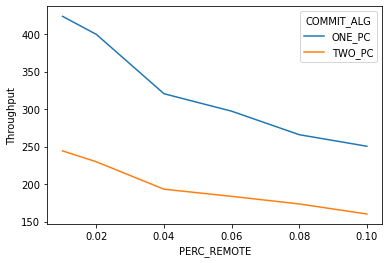

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'PERC_REMOTE'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='PERC_REMOTE', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("PERC_REMOTE")
fig = plot.get_figure()
fig.savefig("pr_std.png")


In [3]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.01]

<ipython-input-3-03762ea7bfaa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  execute_phase (in us)  prepare_phase (in us)  \
0     ONE_PC         0.01               191.2874               33114.32   
6     TWO_PC         0.01               191.4034               30834.34   

   commit_phase (in us)  abort (in us)  
0              0.930205              0  
6          27669.320000              0  


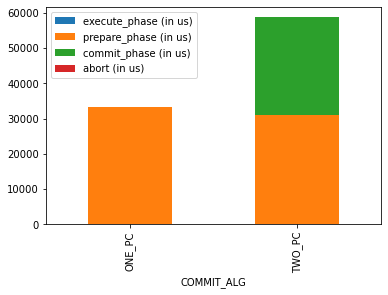

In [4]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_pr_std.png")